# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [77]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

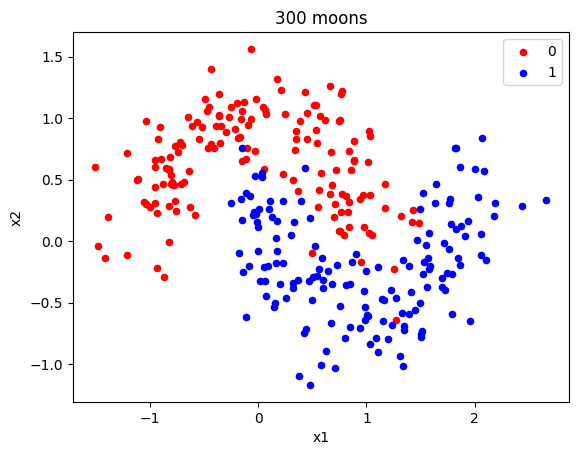

In [78]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

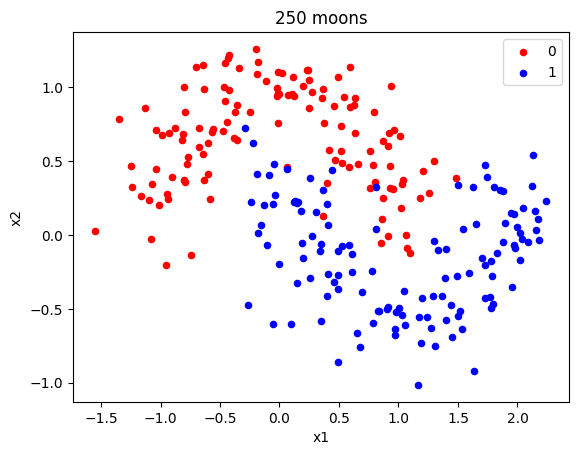

In [79]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
plot_moons(X, y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [81]:
X_train.size

350

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [25]:
from tensorflow.keras import Sequential, layers

In [26]:
model = Sequential()
model.add(layers.Dense(5, input_shape=(2,), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [82]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = Sequential()
    model.add(layers.Dense(5, input_shape=(2,), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [83]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7779 - accuracy: 0.4857
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.3714
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7684 - accuracy: 0.3714
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.3714
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.3657
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7552 - accuracy: 0.3657
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.3600
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7468 - accuracy: 0.3543
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7428 - accuracy: 0.3429
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.3429
Epoch 11/1000
6/6 [

6/6 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7429
Epoch 84/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7429
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7486
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7486
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7486
Epoch 88/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7486
Epoch 89/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7486
Epoch 90/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7486
Epoch 91/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7486
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7486
Epoch 93/1000
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.7771
Epoch 166/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.7771
Epoch 167/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.7771
Epoch 168/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7771
Epoch 169/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.7771
Epoch 170/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.7771
Epoch 171/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.7771
Epoch 172/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7771
Epoch 173/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.7771
Epoch 174/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.7771
Epoch 175/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8343
Epoch 248/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8343
Epoch 249/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8343
Epoch 250/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8343
Epoch 251/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8343
Epoch 252/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8343
Epoch 253/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8343
Epoch 254/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8343
Epoch 255/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8343
Epoch 256/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8343
Epoch 257/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8514
Epoch 330/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8514
Epoch 331/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8514
Epoch 332/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8514
Epoch 333/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8514
Epoch 334/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8514
Epoch 335/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8514
Epoch 336/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8514
Epoch 337/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8514
Epoch 338/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8514
Epoch 339/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8629
Epoch 412/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8629
Epoch 413/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8629
Epoch 414/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8629
Epoch 415/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8629
Epoch 416/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8686
Epoch 417/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.8686
Epoch 418/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.8686
Epoch 419/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.8686
Epoch 420/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8686
Epoch 421/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8743
Epoch 494/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.8743
Epoch 495/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8686
Epoch 496/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8686
Epoch 497/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8686
Epoch 498/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.8743
Epoch 499/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8743
Epoch 500/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8743
Epoch 501/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8743
Epoch 502/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.8800
Epoch 503/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8857
Epoch 576/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8857
Epoch 577/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8857
Epoch 578/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8857
Epoch 579/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2901 - accuracy: 0.8857
Epoch 580/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8857
Epoch 581/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.8857
Epoch 582/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8857
Epoch 583/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8857
Epoch 584/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.8857
Epoch 585/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.8743
Epoch 658/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8743
Epoch 659/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 0.8743
Epoch 660/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8800
Epoch 661/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8800
Epoch 662/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.8800
Epoch 663/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8800
Epoch 664/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.8800
Epoch 665/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.8800
Epoch 666/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.8800
Epoch 667/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8800
Epoch 740/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8800
Epoch 741/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.8800
Epoch 742/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.8800
Epoch 743/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.8800
Epoch 744/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.8800
Epoch 745/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.8800
Epoch 746/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8800
Epoch 747/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8800
Epoch 748/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8800
Epoch 749/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.8800
Epoch 822/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.8800
Epoch 823/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 0.8800
Epoch 824/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.8800
Epoch 825/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8800
Epoch 826/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2624 - accuracy: 0.8800
Epoch 827/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2624 - accuracy: 0.8800
Epoch 828/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.8800
Epoch 829/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.8800
Epoch 830/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.8800
Epoch 831/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8857
Epoch 904/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8857
Epoch 905/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.8857
Epoch 906/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.8857
Epoch 907/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.8857
Epoch 908/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.8857
Epoch 909/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8857
Epoch 910/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8857
Epoch 911/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.8857
Epoch 912/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.8857
Epoch 913/1000


6/6 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.8857
Epoch 986/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.8857
Epoch 987/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.8857
Epoch 988/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8857
Epoch 989/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8857
Epoch 990/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.8857
Epoch 991/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.8857
Epoch 992/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.8857
Epoch 993/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.8857
Epoch 994/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.8857
Epoch 995/1000


👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [50]:
model.history.history["loss"]

[0.7407156229019165,
 0.7360530495643616,
 0.7316374778747559,
 0.7271276712417603,
 0.7229016423225403,
 0.7186160087585449,
 0.7141647338867188,
 0.7100948691368103,
 0.7057116031646729,
 0.7017346024513245,
 0.6976419687271118,
 0.6936427354812622,
 0.6896904706954956,
 0.6857149004936218,
 0.6819101572036743,
 0.6780112981796265,
 0.6742220520973206,
 0.670495867729187,
 0.666710615158081,
 0.6629654169082642,
 0.6591483354568481,
 0.6556165218353271,
 0.652027428150177,
 0.6482146978378296,
 0.6448317766189575,
 0.6411735415458679,
 0.6374810934066772,
 0.6339032053947449,
 0.6304914355278015,
 0.6268080472946167,
 0.623410701751709,
 0.6198499798774719,
 0.6165136098861694,
 0.6130225658416748,
 0.6098016500473022,
 0.6063759922981262,
 0.602920651435852,
 0.5997442007064819,
 0.5963457822799683,
 0.5932335257530212,
 0.5900362133979797,
 0.5868065357208252,
 0.5838291049003601,
 0.5807128548622131,
 0.5778344869613647,
 0.5747146010398865,
 0.5718563199043274,
 0.568679571151733

❓ Plot the history of the train loss using the following function ❓

In [84]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

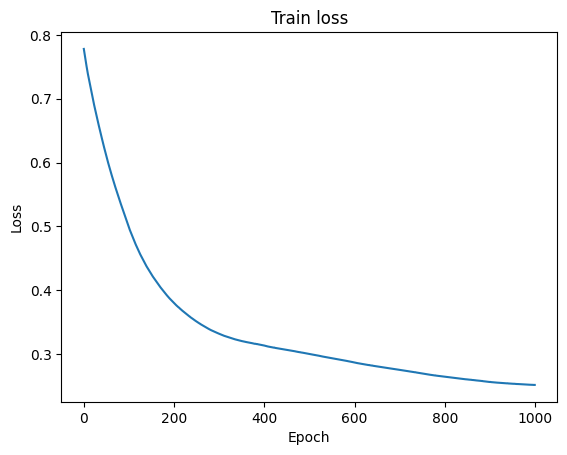

In [85]:
plot_history(model.history)

❓ What do you observe ❓

We haven't converged yet, we need more epochs

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [55]:
y_pred = model.predict(X_train)

6/6 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [68]:
accuracy = model.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9067


**🧪 Test your code**

In [69]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/arostagnat/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/arostagnat/code/arostagnat/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [72]:
from utils.plots import plot_decision_regions 

1940/1940 [==============================] - 3s 1ms/step


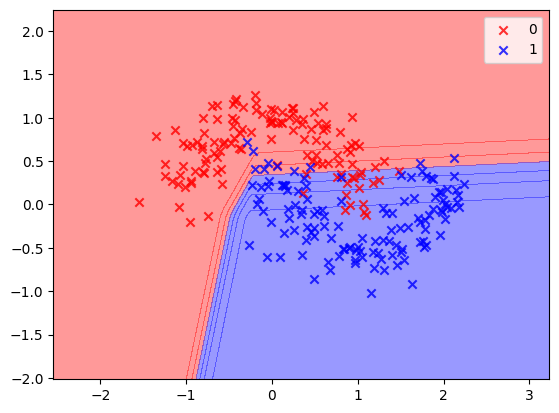

In [75]:
plot_decision_regions(X,y, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

❓ Did the test accuracy improve? ❓

Not really

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [86]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = Sequential()
    model.add(layers.Dense(20, input_shape=(2,), activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [89]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7454 - accuracy: 0.4057
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.4286
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5086
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5543
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.7029
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.8286
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.8229
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.8171
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.8114
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.8229
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.8971
Epoch 85/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.8971
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.8971
Epoch 87/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9029
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9029
Epoch 89/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.8971
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9029
Epoch 91/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.9029
Epoch 92/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.9029
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9029
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9371
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9371
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9371
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9371
Epoch 171/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9314
Epoch 172/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9314
Epoch 173/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9314
Epoch 174/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1502 - accuracy: 0.9314
Epoch 175/500
6/6 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.9314
Epoch 176/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9371
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9543
Epoch 250/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9543
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9543
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9543
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9543
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9543
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9600
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9600
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9543
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9600
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9600
Epoch 332/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9600
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9600
Epoch 334/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9657
Epoch 335/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9657
Epoch 336/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9657
Epoch 337/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9600
Epoch 338/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9657
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9657
Epoch 340/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9657
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9657
Epoch 414/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9657
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9657
Epoch 416/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.9657
Epoch 417/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9657
Epoch 418/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9657
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9600
Epoch 420/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0839 - accuracy: 0.9600
Epoch 421/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9600
Epoch 422/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9657
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9657
Epoch 496/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9600
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9657
Epoch 498/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9657
Epoch 499/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9657
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9657


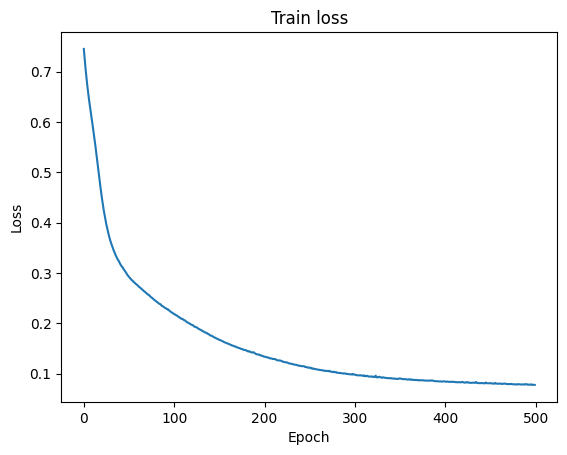

In [90]:
plot_history(model.history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [91]:
accuracy_deep = model.evaluate(X_test, y_test)[1]
accuracy_deep

3/3 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9867


0.9866666793823242

🧪 **Test your code**

In [92]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/arostagnat/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/arostagnat/code/arostagnat/data-your-first-neural-network/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1940/1940 [==============================] - 3s 1ms/step


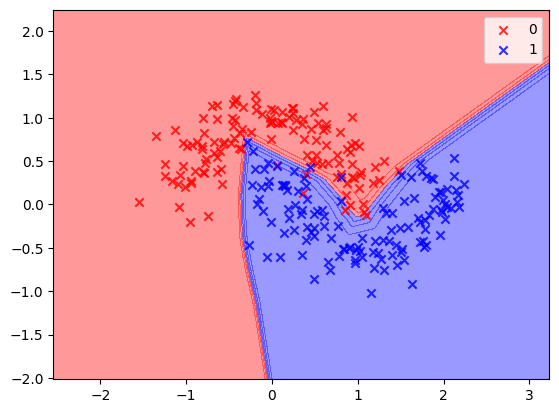

In [93]:
plot_decision_regions(X,y, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!